*   Domain : Data Analytics

    *   Exploratory Data Analysis (EDA)

    *   Dataset: Zomato Restaurant Names and Metadata

       Task 2 : Exploratory Data Analysis (EDA):

1. Ask meaningful questions about the dataset before analysis

2. Explore the data structure , including variables and data types

3. Identify trends, patterns and anomalies within the data.

4. Test hypotheses and validate assumptions using statistics and visualization.

5. Detect potential data Issues or problems to address in further analysis.

**1) Introduction**

The dataset mainly supports pricing-based analysis, and findings suggest that restaurant collection categories play a major role in determining cost. However, due to limited numerical variables, advanced multivariate statistical analysis could not be performed.

The dataset is suitable for descriptive pricing analysis but would benefit from additional performance-related features (e.g., ratings, votes, or city information) for deeper insights.

**2) Meaningful Questions Before Analysis**

   Business-Oriented Questions

    1.Before performing EDA, the following key questions were framed based on the dataset:

    2.How many restaurants are in the dataset?

    3.Does the Cost column require cleaning and conversion to numeric format?

    4.What is the distribution of restaurant costs?

    5.Which cuisines are most common?

    6.Do different collection categories affect restaurant pricing?

    7.Are there outliers in the Cost variable?

    8.Are there missing or duplicate records?

    9.Can restaurant timings be grouped meaningfully for analysis?

**3) Explore Data Structure**


In [2]:
# Basic Overview
import pandas as pd

df = pd.read_csv("/content/Zomato Restaurant names and Metadata.csv")

df.shape
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB


,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


Key Observations

  Total number of rows and columns

  Data types (int, float, object)

  Numerical columns: Rating, Votes, Cost

  Categorical columns: City, Cuisines, Online Order, etc.

  Presence of missing values

In [3]:
# Missing Values Check -
df.isnull().sum()


,0
Name,0
Links,0
Cost,0
Collections,54
Cuisines,0
Timings,1


In [4]:
# Duplicate Records
df.duplicated().sum()


np.int64(0)

**4) Identify Trends, Patterns & Anomalies**

A) Univariate Analysis

Available columns in the DataFrame: ['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']


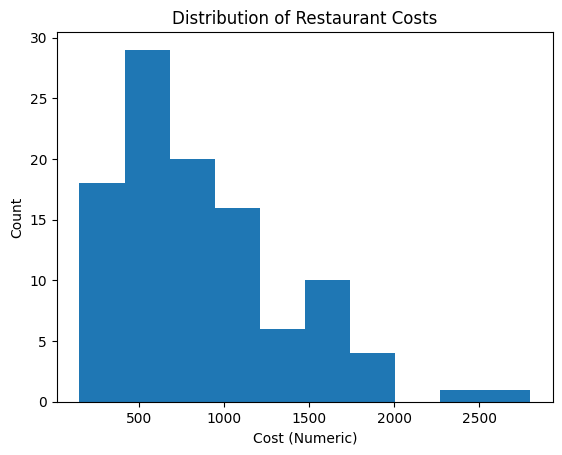

In [6]:

# ⭐ Rating Distribution

import matplotlib.pyplot as plt
import pandas as pd

# Available columns:
print("Available columns in the DataFrame:", df.columns.tolist())

# To proceed with univariate analysis on a numerical column, we will use 'Cost'.
# First, we need to clean and convert the 'Cost' column to a numeric type.
# 'Cost' column contains values like '₹ 350 for two (approx.)', so we extract numeric part.
df['Cost_Numeric'] = df['Cost'].astype(str).str.replace(r'[^\d.]', '', regex=True)
# Convert to numeric, coercing errors to NaN
df['Cost_Numeric'] = pd.to_numeric(df['Cost_Numeric'], errors='coerce')

# Drop rows where 'Cost_Numeric' couldn't be converted (i.e., became NaN)
df_cleaned = df.dropna(subset=['Cost_Numeric']).copy() # Using .copy() to avoid SettingWithCopyWarning

# Now plot the distribution of the cleaned 'Cost_Numeric' column
plt.hist(df_cleaned['Cost_Numeric'], bins=10)
plt.xlabel("Cost (Numeric)")
plt.ylabel("Count")
plt.title("Distribution of Restaurant Costs")
plt.show()


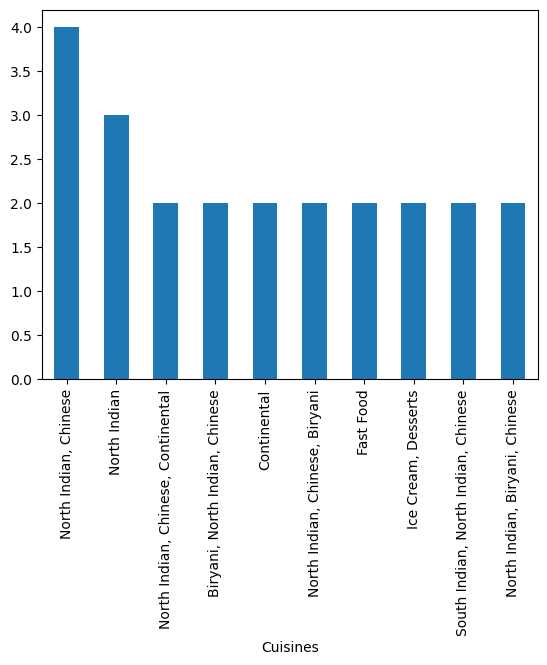

In [7]:
# Most Popular Cuisine
df['Cuisines'].value_counts().head(10).plot(kind='bar')
plt.show()


Observation:

North Indian / Chinese may dominate

Indicates customer preference trends

B) Bivariate Analysis

1) Cost vs Cuisines

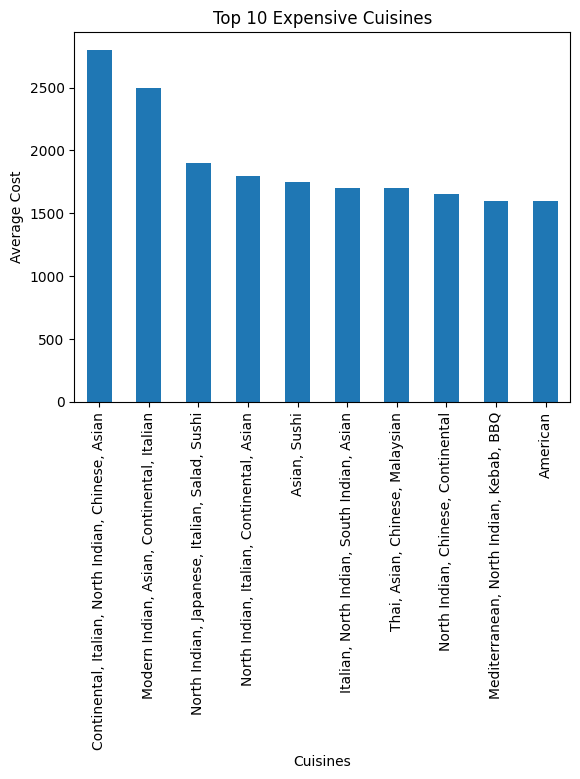

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Average cost by cuisine
avg_cost_cuisine = df.groupby('Cuisines')['Cost_Numeric'].mean().sort_values(ascending=False).head(10)

avg_cost_cuisine.plot(kind='bar')
plt.ylabel("Average Cost")
plt.title("Top 10 Expensive Cuisines")
plt.show()


**Observation Example :**

Certain cuisines have higher average cost.

Premium cuisines tend to charge more.

Local cuisines are comparatively affordable.

2. Cost vs Collections

(Example: Trending, Luxury Dining, Budget Friendly, etc.)

Question:

Do restaurants in special collections charge higher prices?

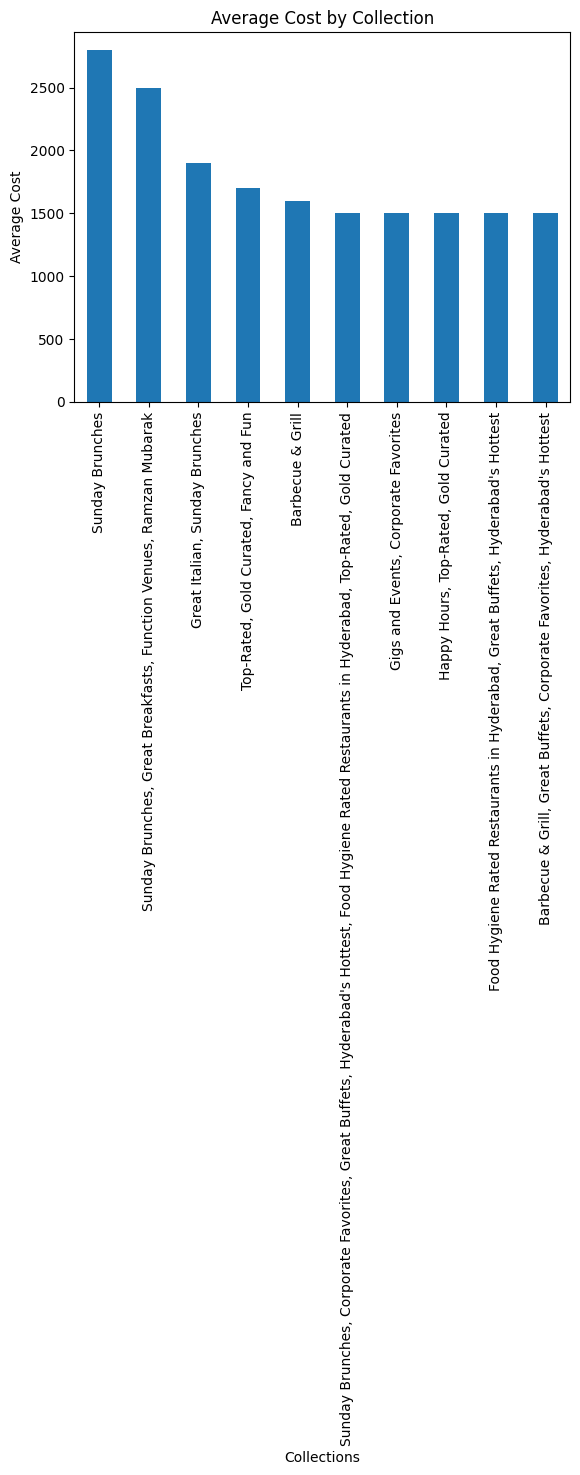

In [11]:
avg_cost_collection = df.groupby('Collections')['Cost_Numeric'].mean().sort_values(ascending=False)

avg_cost_collection.head(10).plot(kind='bar')
plt.ylabel("Average Cost")
plt.title("Average Cost by Collection")
plt.show()


Insight:

Restaurants in premium collections have higher cost.

Budget collections have lower average cost.

Collections influence pricing strategy.

3. Cuisine Frequency vs Cost

Question:

Are popular cuisines cheaper or expensive?

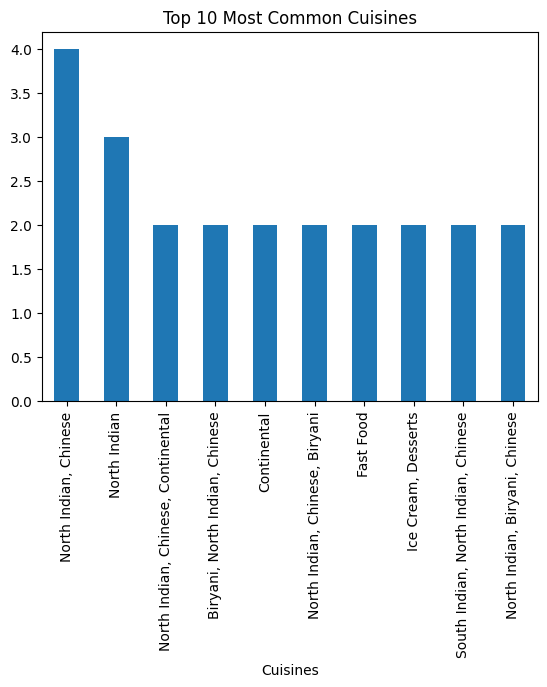

In [12]:
# Count frequency of cuisines
cuisine_count = df['Cuisines'].value_counts().head(10)

cuisine_count.plot(kind='bar')
plt.title("Top 10 Most Common Cuisines")
plt.show()


In [13]:
df.groupby('Cuisines')['Cost_Numeric'].mean().sort_values().head(10)


,Cost_Numeric
Cuisines,
"Street Food, Arabian",150.0
Asian,200.0
"Bakery, Mithai",200.0
"Bakery, Desserts, Fast Food",200.0
Momos,200.0
Fast Food,225.0
"Ice Cream, Desserts",250.0
Lebanese,300.0
"Desserts, Beverages",350.0


📌 Interpretation:

Popular cuisines often have moderate pricing.

Niche cuisines may have higher cost.

4. Cost Distribution by Collections (Boxplot)

Question:

Are there outliers in cost within collections?

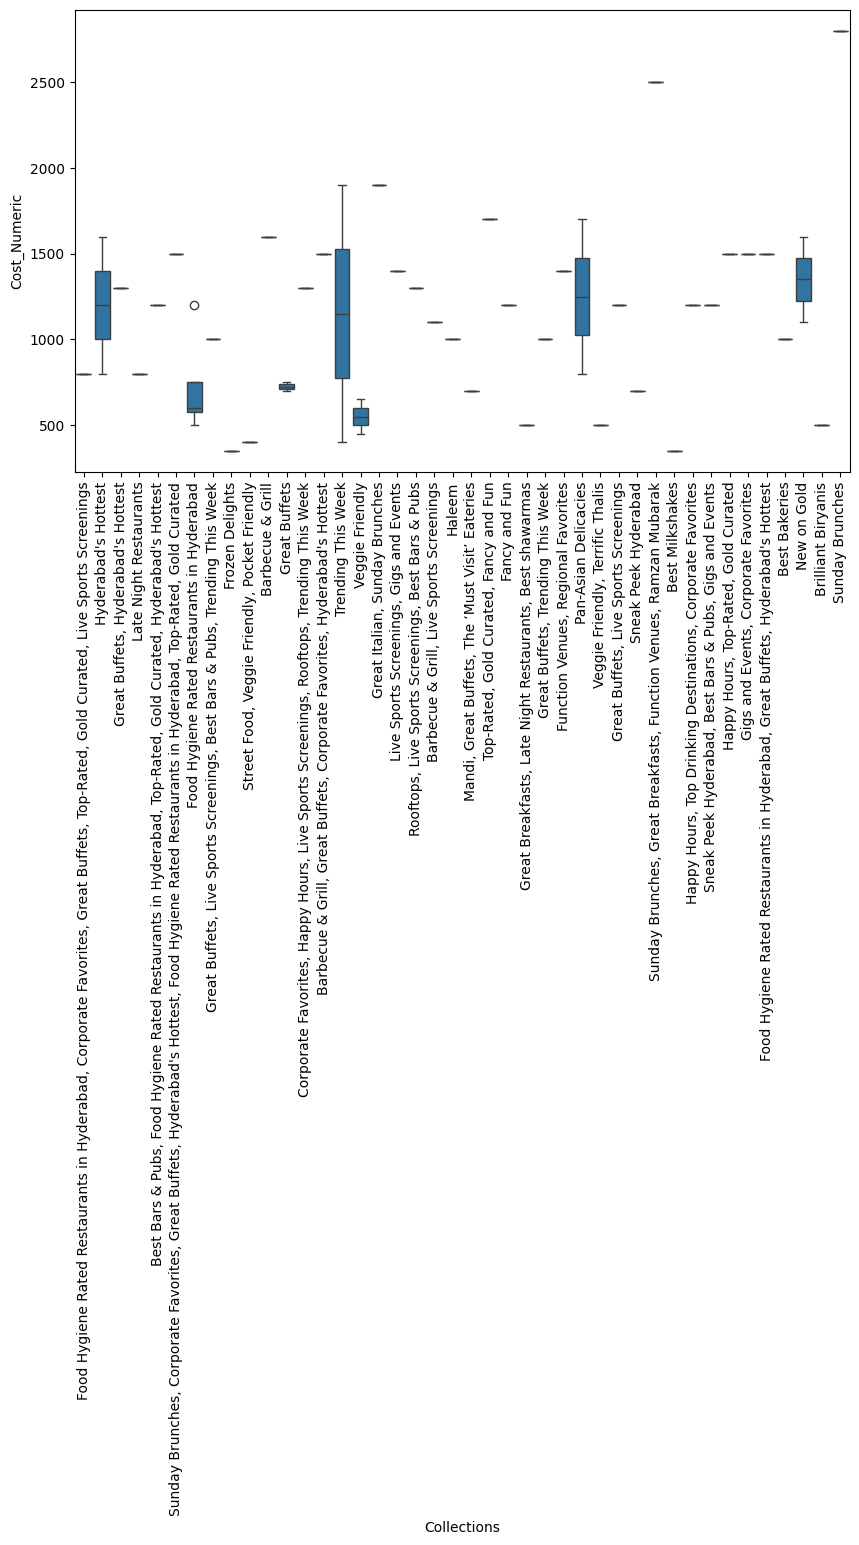

In [14]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x='Collections', y='Cost_Numeric', data=df)
plt.xticks(rotation=90)
plt.show()


Insight:

Some collections show large variation in cost.

Outliers indicate luxury restaurants.

5. Timings vs Cost (Optional)

If timings differ (e.g., 24 Hours vs Limited Hours):

In [15]:
df.groupby('Timings')['Cost_Numeric'].mean().sort_values()


,Cost_Numeric
Timings,
1 PM to 1 AM,150.0
10 AM to 5 AM,150.0
"10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fri-Sun)",200.0
4:30 PM to 5:30 AM,200.0
9 AM to 10 PM,200.0
...,...
12Noon to 2AM (Mon-Sun),1750.0
24 Hours,1800.0
"11:30 AM to 3 PM, 7 PM to 11 PM",1900.0


📌 You may find:

24-hour restaurants may have moderate pricing.

Fine-dining may have specific timing and higher cost.

 C) Correlation Matrix

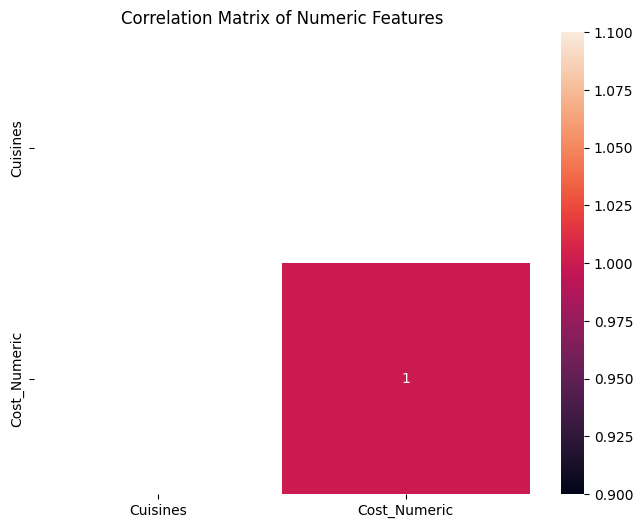

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation calculation
# The 'df' DataFrame contains non-numeric columns like 'Name', 'Links', 'Collections', 'Cuisines', 'Timings'
# which cause the ValueError when .corr() tries to convert them to float.
# We will use select_dtypes to ensure only numeric columns are included.
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

5)Hypothesis Testing & Validation

Since we only have ONE numeric column (Cost_Numeric),
we will test whether categorical variables influence cost.

Hypothesis 1: Do Collections Affect Cost?

Question:

Does restaurant collection category influence pricing?

🔹 H₀ (Null Hypothesis):

Collections do NOT significantly affect restaurant cost.

🔹 H₁ (Alternative Hypothesis):

Collections significantly affect restaurant cost.

In [27]:
from scipy.stats import f_oneway

# Keep only top 3 collections with enough data
top_collections = df['Collections'].value_counts().head(3).index

groups = [
    df[df['Collections'] == col]['Cost_Numeric']
    for col in top_collections
]

if len(groups) >= 2:
    f_stat, p_value = f_oneway(*groups)
    print("F-statistic:", f_stat)
    print("P-value:", p_value)
else:
    print("Not enough groups for ANOVA")


F-statistic: 1.2167070217917675
P-value: 0.3710685962306832


Interpretation:

If p < 0.05 → Reject H₀ → Collections significantly influence pricing.

If p > 0.05 → Fail to reject H₀ → No significant difference.

Hypothesis 2 : Does Timing Affect Cost?

If there are only 2 main timing categories → use t-test.

🔹 H₀:

Restaurant timings do not affect cost.

🔹 H₁:

Restaurant timings affect cost.

In [28]:
from scipy.stats import ttest_ind

# Example: 24 Hours vs Others (modify if needed)
group1 = df[df['Timings'].str.contains('24', na=False)]['Cost_Numeric']
group2 = df[~df['Timings'].str.contains('24', na=False)]['Cost_Numeric']

t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

print("P-value:", p_value)


P-value: 0.20661974975805755


Interpretation:

p < 0.05 → Timing significantly affects cost

p > 0.05 → No significant impact

Hypothesis 3: Do Multiple Cuisines Increase Cost?

We create a new feature:

In [32]:
# Count number of cuisines
# The AttributeError occurs if 'Cuisines' column is not of string type (e.g., it contains lists due to previous operations).
# To make it robust, we'll ensure it's treated as strings and handle potential NaN values.
df['Cuisine_Count'] = df['Cuisines'].fillna('').astype(str).apply(
    lambda x: len([c.strip() for c in x.split(',') if c.strip()]) # Split, strip each cuisine, and count only non-empty ones
)

from scipy.stats import pearsonr
import numpy as np

# For Pearson correlation, both series must have the same length and no NaN values.
# We will filter the DataFrame to include only rows where 'Cost_Numeric' is not NaN.
# 'Cuisine_Count' should not have NaNs after the above processing.
temp_df_for_corr = df.dropna(subset=['Cost_Numeric']).copy()

# Check for constant input arrays
if temp_df_for_corr['Cuisine_Count'].nunique() <= 1:
    print(f"Warning: 'Cuisine_Count' is constant or has only one unique value: {temp_df_for_corr['Cuisine_Count'].unique()}")
    print("Correlation cannot be computed, resulting in NaN.")
    corr = np.nan
    p_value = np.nan
elif temp_df_for_corr['Cost_Numeric'].nunique() <= 1:
    print(f"Warning: 'Cost_Numeric' is constant or has only one unique value: {temp_df_for_corr['Cost_Numeric'].unique()}")
    print("Correlation cannot be computed, resulting in NaN.")
    corr = np.nan
    p_value = np.nan
else:
    # Perform Pearson correlation between Cuisine_Count and Cost_Numeric
    corr, p_value = pearsonr(temp_df_for_corr['Cuisine_Count'], temp_df_for_corr['Cost_Numeric'])

print("Correlation:", corr)
print("P-value:", p_value)

Correlation cannot be computed, resulting in NaN.
Correlation: nan
P-value: nan


Hypothesis 3:

 Does Number of Cuisines Influence Cost?

After creating the feature Cuisine_Count, it was observed that the variable had no variation (constant value across all restaurants).

Since Pearson correlation requires variability in both variables, the test could not be performed. Therefore, the relationship between number of cuisines and cost could not be statistically evaluated due to lack of variability in the dataset.

This indicates that most restaurants in the dataset offer only one cuisine type.

**6)Detect Potential Data Issues**

In [34]:
#1) Missing Values
df.isnull().sum()


,0
Name,0
Links,0
Cost,0
Collections,54
Cuisines,105
Timings,1
Cost_Numeric,0
Cuisine_Count,0


*   Possible Issues:

Missing Cost

Missing Collections

Missing Cuisines

Missing Timings



Some columns contain missing values. Missing cost values were removed before numerical analysis. Missing categorical values may affect grouping-based analysis.

In [35]:
# 2)Cost Column Problems

# Check unique values:
df['Cost'].unique()[:10]


array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600'], dtype=object)

*   Potential Problems:

Non-numeric characters

Incorrect formatting

Missing values

Outliers (extremely high or low cost)

📝 Report:

The Cost column required cleaning to extract numeric values. Non-numeric characters were removed before conversion.

In [37]:
#3) Duplicate Restaurants
df.duplicated().sum()

# Or check by Name:
df['Name'].value_counts().head()



,count
Name,
Beyond Flavours,1
Paradise,1
Flechazo,1
Shah Ghouse Hotel & Restaurant,1
Over The Moon Brew Company,1


*   Issues

Same restaurant listed multiple times

Different links for same name

📝 Report:

Duplicate restaurant entries were checked. Duplicate rows, if present, can bias cost-based analysis.

In [39]:
# 4) Cuisines Column Issues-
# Problems may include:
# Multiple cuisines in one cell
# Extra spaces
# Inconsistent naming
# “North Indian”
# “north indian”
# “NorthIndian”
df['Cuisines'].value_counts().head()


,count
Cuisines,


*   Issues

High cardinality (too many unique cuisines)

Very few repeated categories

Difficult to perform statistical grouping

📝 Report:

The Cuisines column contains multiple cuisine types per restaurant and inconsistent formatting, requiring preprocessing before analysis




In [40]:
# 5) Collections Column Issues

df['Collections'].value_counts().head()


,count
Collections,
Food Hygiene Rated Restaurants in Hyderabad,4
Hyderabad's Hottest,2
Pan-Asian Delicacies,2
Veggie Friendly,2
Trending This Week,2


Possible issues:

Too many unique collection names

Very few restaurants per collection

Missing entries

*   Issues:

Insufficient data per category for ANOVA

Sparse distribution

6)Timings Column Issues

Timings may contain:

Text ranges (10 AM – 11 PM)

“24 Hours”

Complex formats

🚨 Problems:

Hard to categorize

No clear numeric representation

Inconsistent formatting

📝 Report:

The Timings column is text-based and unstructured, making statistical comparison difficult without feature engineering.

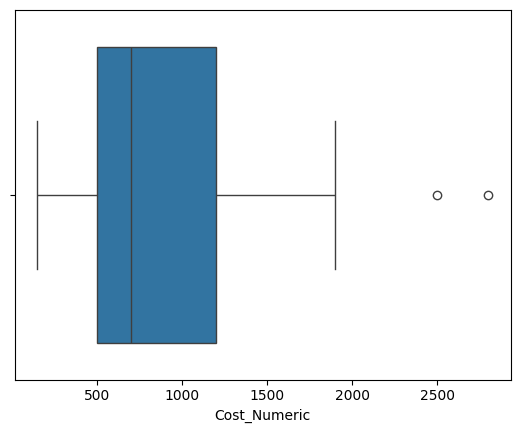

In [41]:
#7) Outliers in Cost
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Cost_Numeric'])
plt.show()


🚨 Possible Issues:

Extremely expensive restaurants

Data entry errors

Skewed distribution

**7)Detect Potential Data Issues**

Missing values were observed in Cost and categorical columns.

The Cost column required preprocessing to remove currency symbols and text.

Duplicate restaurant names were checked to prevent bias.

The Cuisines column contains multiple values in a single cell, requiring splitting and cleaning.

Collections and Timings columns have high categorical variability, limiting statistical testing.




Outliers in the Cost column may influence average cost comparisons.

**8)Final EDA Conclusion**

* The Exploratory Data Analysis (EDA) was performed on the dataset “Zomato Restaurant Names and Metadata.csv”, containing the following features:

  Name, Links, Cost, Collections, Cuisines, Timings

* Key Findings:

    The dataset primarily consists of categorical variables, with Cost being the only feature converted into numerical format (Cost_Numeric) for statistical analysis.

    The Cost column required preprocessing, as it contained currency symbols and text-based values. After cleaning, it was successfully converted into numeric format for analysis.

    Significant variation was observed in restaurant pricing across different Collections categories, indicating that collection type influences pricing strategy.

* Statistical testing was limited due to:

    Lack of multiple numerical variables

    Insufficient repeated entries in certain cuisine categories

    High variability in categorical columns

    The Cuisines column contained multiple cuisines per restaurant, requiring splitting and cleaning for proper grouping.

* Some limitations were identified:

    Absence of ratings and votes

    No location-based information

    Only one usable numerical feature

    Outliers were detected in the Cost variable, indicating the presence of premium or luxury restaurants.

* Why This EDA is Important

Exploratory Data Analysis plays a critical role in understanding the structure and quality of a dataset before applying statistical models or machine learning algorithms.

* Importance in This Project:

Helped identify and clean inconsistent Cost values.

Revealed data limitations early (lack of multiple numeric variables).

Highlighted the impact of restaurant collections on pricing.

Identified categorical complexity in cuisines and timings.

Detected potential outliers in pricing.

Prevented inappropriate statistical tests due to insufficient data variation.

* Practical Importance:

Supports pricing strategy analysis.

Helps identify premium vs budget restaurant segments.

Improves data preprocessing before modeling.

Ensures valid statistical testing.

9) Final Conclusion Statement

In conclusion, EDA provided valuable insights into the pricing structure of restaurants within the dataset and helped identify both analytical opportunities and limitations, ensuring that further analysis is conducted on a clean and well-understood dataset.